In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime
import matplotlib.dates as mdates

## Pulling the data from online

In [2]:
data = pd.read_csv('https://github.com/nytimes/covid-19-data/raw/master/us-counties.csv')

In [3]:
data.sample(10)

,date,county,state,fips,cases,deaths
220531,2020-06-08,Tulsa,Oklahoma,40143.0,1196,60
414290,2020-08-08,Madison,Tennessee,47113.0,1064,17
76730,2020-04-21,Tensas,Louisiana,22107.0,1,0
54614,2020-04-13,McPherson,Kansas,20113.0,13,0
145296,2020-05-15,La Paz,Arizona,4012.0,36,2
339538,2020-07-16,Chase,Nebraska,31029.0,1,0
123250,2020-05-07,Wayne,Ohio,39169.0,177,41
285181,2020-06-29,Antrim,Michigan,26009.0,18,0
328019,2020-07-12,Fairfax city,Virginia,51600.0,72,7
290609,2020-07-01,Lake,Florida,12069.0,1410,22


In [4]:
pops = pd.read_excel('https://www2.census.gov/programs-surveys/popest/tables/2010-2019/counties/totals/co-est2019-annres.xlsx', header=3)


In [5]:
pops.head()

,Unnamed: 0,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,United States,308745538.0,308758105.0,309321666.0,311556874.0,313830990.0,315993715.0,318301008.0,320635163.0,322941311.0,324985539.0,326687501.0,328239523.0
1,".Autauga County, Alabama",54571.0,54597.0,54773.0,55227.0,54954.0,54727.0,54893.0,54864.0,55243.0,55390.0,55533.0,55869.0
2,".Baldwin County, Alabama",182265.0,182265.0,183112.0,186558.0,190145.0,194885.0,199183.0,202939.0,207601.0,212521.0,217855.0,223234.0
3,".Barbour County, Alabama",27457.0,27455.0,27327.0,27341.0,27169.0,26937.0,26755.0,26283.0,25806.0,25157.0,24872.0,24686.0
4,".Bibb County, Alabama",22915.0,22915.0,22870.0,22745.0,22667.0,22521.0,22553.0,22566.0,22586.0,22550.0,22367.0,22394.0


## Adding Rolling Averages for Each of the Counties

In [6]:
counties = ['Albemarle','Charlottesville city']
frame_list = []
county_data = pd.DataFrame(columns=['date','county','state','fips','cases', 'deaths'])
for i in range(len(counties)):
    county = counties[i]
    new_data = data[data.county == county]
    new_data['new_cases'] = new_data.cases.diff()
    new_data['rolling_avg'] = new_data.new_cases.rolling(window=7, min_periods=7).mean().round(2)
    frame_list.append(new_data)
full_data = pd.concat(frame_list)
full_data.fillna(0, inplace=True)
full_data.sample(10)

C:\Users\Jason\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\Jason\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,date,county,state,fips,cases,deaths,new_cases,rolling_avg
324818,2020-07-11,Charlottesville city,Virginia,51540.0,270,7,10.0,5.71
86557,2020-04-24,Albemarle,Virginia,51003.0,72,3,1.0,2.29
156937,2020-05-18,Albemarle,Virginia,51003.0,139,4,1.0,2.29
236742,2020-06-13,Charlottesville city,Virginia,51540.0,148,3,2.0,2.43
230527,2020-06-11,Charlottesville city,Virginia,51540.0,144,3,2.0,1.86
184298,2020-05-27,Charlottesville city,Virginia,51540.0,97,3,7.0,3.57
249189,2020-06-17,Charlottesville city,Virginia,51540.0,161,3,1.0,2.71
427539,2020-08-12,Charlottesville city,Virginia,51540.0,550,15,4.0,6.57
246076,2020-06-16,Charlottesville city,Virginia,51540.0,160,3,6.0,2.71
5094,2020-03-19,Charlottesville city,Virginia,51540.0,1,0,0.0,0.00


## Population Clean-Up

In [7]:
pops = pops[['Unnamed: 0', 2019]]
pops.head()

,Unnamed: 0,2019
0,United States,328239523.0
1,".Autauga County, Alabama",55869.0
2,".Baldwin County, Alabama",223234.0
3,".Barbour County, Alabama",24686.0
4,".Bibb County, Alabama",22394.0


In [8]:
pops.drop(range(3143,3149), axis=0, inplace=True) #dropping the notes at the end 
pops.drop(0, axis=0, inplace=True) #dropping the US as a whole 
pops.rename({'Unnamed: 0': 'Original_County', 2019: 'Population'}, axis=1, inplace=True) #renaming the columns of the DF
pops.reset_index(drop=True, inplace=True) #resetting the index

In [9]:
pops.head()

,Original_County,Population
0,".Autauga County, Alabama",55869.0
1,".Baldwin County, Alabama",223234.0
2,".Barbour County, Alabama",24686.0
3,".Bibb County, Alabama",22394.0
4,".Blount County, Alabama",57826.0


In [10]:
pops.tail()

,Original_County,Population
3137,".Sweetwater County, Wyoming",42343.0
3138,".Teton County, Wyoming",23464.0
3139,".Uinta County, Wyoming",20226.0
3140,".Washakie County, Wyoming",7805.0
3141,".Weston County, Wyoming",6927.0


In [11]:
#Putting the county and state into separate columns
pops[['county','state']] = pops.Original_County.str.split(',', expand=True)
pops.county = pops.county.str.strip('.').str.replace('County','').str.strip() #stripping out the leading period and the word "County"
pops.state = pops.state.str.strip()
pops.sample(10)

,Original_County,Population,county,state
2844,".Cumberland County, Virginia",9932.0,Cumberland,Virginia
141,".Howard County, Arkansas",13202.0,Howard,Arkansas
2270,".Forest County, Pennsylvania",7247.0,Forest,Pennsylvania
1068,".Madison County, Kentucky",92987.0,Madison,Kentucky
1830,".Bronx County, New York",1418207.0,Bronx,New York
2841,".Clarke County, Virginia",14619.0,Clarke,Virginia
496,".Paulding County, Georgia",168667.0,Paulding,Georgia
2173,".Love County, Oklahoma",10253.0,Love,Oklahoma
1987,".Wilson County, North Carolina",81801.0,Wilson,North Carolina
2327,".Chester County, South Carolina",32244.0,Chester,South Carolina


In [12]:
final = pd.merge(full_data,pops, on=['county', 'state'], how='left')
final['cases_per_100k'] = final.rolling_avg / (final.Population / 100000)
final.date = pd.to_datetime(final.date)

## Past 10 Days of Raw Data

In [13]:
final[final.county=='Albemarle'].tail(10)

,date,county,state,fips,cases,deaths,new_cases,rolling_avg,Original_County,Population,cases_per_100k
144,2020-08-12,Albemarle,Virginia,51003.0,856,16,8.0,9.29,".Albemarle County, Virginia",109330.0,8.497210
145,2020-08-13,Albemarle,Virginia,51003.0,869,16,13.0,10.14,".Albemarle County, Virginia",109330.0,9.274673
146,2020-08-14,Albemarle,Virginia,51003.0,883,16,14.0,9.43,".Albemarle County, Virginia",109330.0,8.625263
147,2020-08-15,Albemarle,Virginia,51003.0,890,16,7.0,8.14,".Albemarle County, Virginia",109330.0,7.445349
148,2020-08-16,Albemarle,Virginia,51003.0,906,16,16.0,9.71,".Albemarle County, Virginia",109330.0,8.881368
149,2020-08-17,Albemarle,Virginia,51003.0,913,16,7.0,10.14,".Albemarle County, Virginia",109330.0,9.274673
150,2020-08-18,Albemarle,Virginia,51003.0,916,16,3.0,9.71,".Albemarle County, Virginia",109330.0,8.881368
151,2020-08-19,Albemarle,Virginia,51003.0,921,16,5.0,9.29,".Albemarle County, Virginia",109330.0,8.497210
152,2020-08-20,Albemarle,Virginia,51003.0,930,16,9.0,8.71,".Albemarle County, Virginia",109330.0,7.966706
153,2020-08-21,Albemarle,Virginia,51003.0,943,16,13.0,8.57,".Albemarle County, Virginia",109330.0,7.838654


In [14]:
final[final.county=='Charlottesville city'].tail(10)

,date,county,state,fips,cases,deaths,new_cases,rolling_avg,Original_County,Population,cases_per_100k
302,2020-08-12,Charlottesville city,Virginia,51540.0,550,15,4.0,6.57,".Charlottesville city, Virginia",47266.0,13.900055
303,2020-08-13,Charlottesville city,Virginia,51540.0,554,15,4.0,7.00,".Charlottesville city, Virginia",47266.0,14.809800
304,2020-08-14,Charlottesville city,Virginia,51540.0,555,15,1.0,5.00,".Charlottesville city, Virginia",47266.0,10.578428
305,2020-08-15,Charlottesville city,Virginia,51540.0,558,15,3.0,3.00,".Charlottesville city, Virginia",47266.0,6.347057
306,2020-08-16,Charlottesville city,Virginia,51540.0,560,15,2.0,2.57,".Charlottesville city, Virginia",47266.0,5.437312
307,2020-08-17,Charlottesville city,Virginia,51540.0,560,15,0.0,2.43,".Charlottesville city, Virginia",47266.0,5.141116
308,2020-08-18,Charlottesville city,Virginia,51540.0,561,15,1.0,2.14,".Charlottesville city, Virginia",47266.0,4.527567
309,2020-08-19,Charlottesville city,Virginia,51540.0,566,14,5.0,2.29,".Charlottesville city, Virginia",47266.0,4.844920
310,2020-08-20,Charlottesville city,Virginia,51540.0,570,14,4.0,2.29,".Charlottesville city, Virginia",47266.0,4.844920
311,2020-08-21,Charlottesville city,Virginia,51540.0,575,14,5.0,2.86,".Charlottesville city, Virginia",47266.0,6.050861


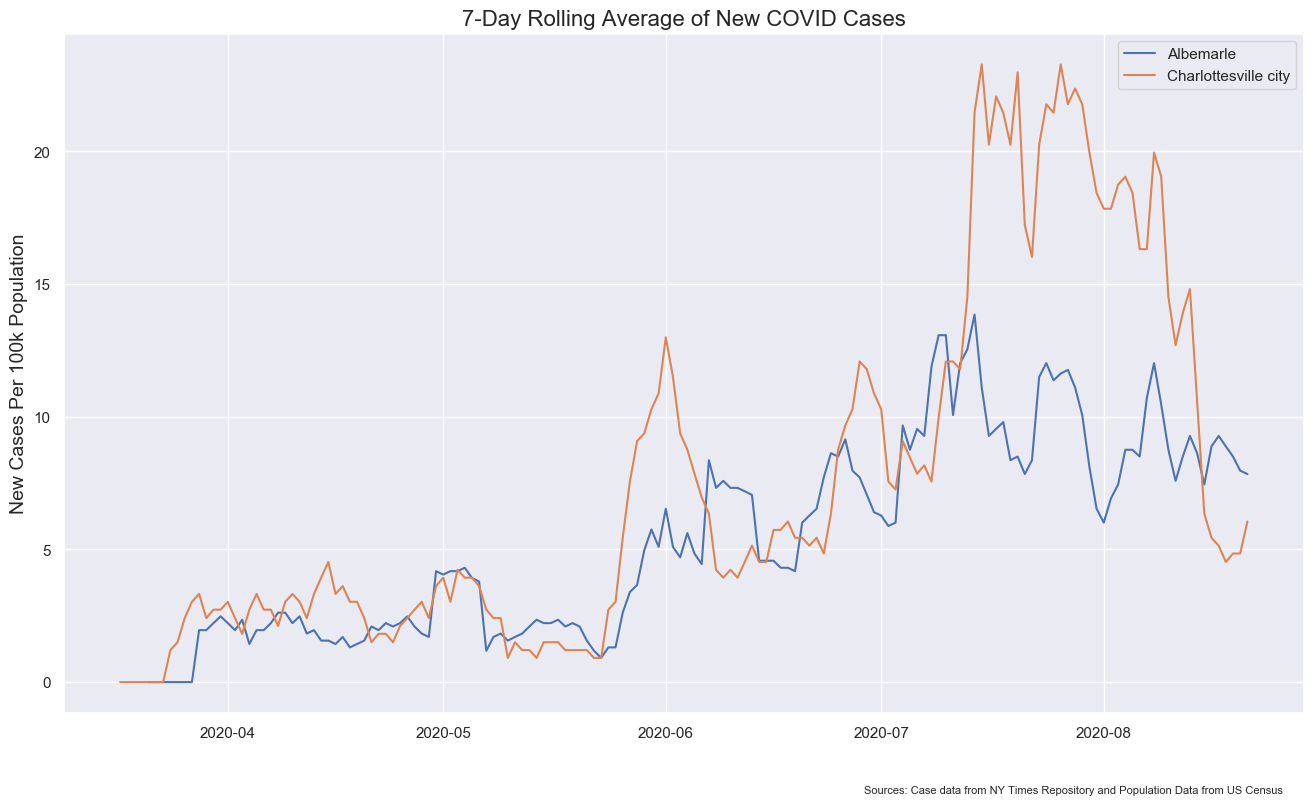

In [15]:
sns.set()
fig, axes = plt.subplots(1, 1,figsize=(16, 9), dpi=100)
plt.plot(final[final.county =='Albemarle'].date, final[final.county =='Albemarle'].cases_per_100k)
plt.plot(final[final.county =='Charlottesville city'].date, final[final.county =='Charlottesville city'].cases_per_100k)
plt.ylabel('New Cases Per 100k Population', fontsize=14)
months = mdates.MonthLocator()  # every month
axes.xaxis.set_major_locator(months)
plt.legend(counties)
plt.title("7-Day Rolling Average of New COVID Cases", fontsize=16)
plt.annotate("Sources: Case data from NY Times Repository and Population Data from US Census", xy=(800,-80), xycoords="axes pixels", fontsize=8)
plt.show()
fig.savefig('C:/Users/Jason/Documents/COVID/covidplot.png')